Изменение архитектуры [Yolov8](https://docs.ultralytics.com/ru/models/yolov8/) под данные (50 баллов)

Нужно изменить архитектуру [Yolov8](https://docs.ultralytics.com/ru/models/yolov8/)  для [задачи детектирования лиц](http://shuoyang1213.me/WIDERFACE/).

Особенность датасета в том, что относительная площадь лиц достаточно большая, то есть лица "находятся близко".  
Из этих условий можно изменить детектор.

Скачайте архив, распакуйте, распакованные файлы выложите рядом с этим ноутбуком там лежат веса базовой модели:  
https://drive.google.com/file/d/1MDl6Irh9pcZRzyWg1mrPaxHrDiehmJAc/view?usp=sharing


### Скачаем датасет

Датасет находится по ссылке:  
https://drive.google.com/file/d/1XtUu5Eh_QuLqHOKgbrKEhbVXbxeYFbYv/view?usp=sharing

Нужно его скачать и распаковать в папке, в которой находится ноутбук

### Установим библиотеки

In [1]:
!pip install ultralytics torch torchvision matplotlib numpy pillow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# Подключим библиотеки

In [2]:
import os
import shutil
import time

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision.datasets import WIDERFace
from PIL import Image
from ultralytics import YOLO

# Можем посмотреть примеры с датасета

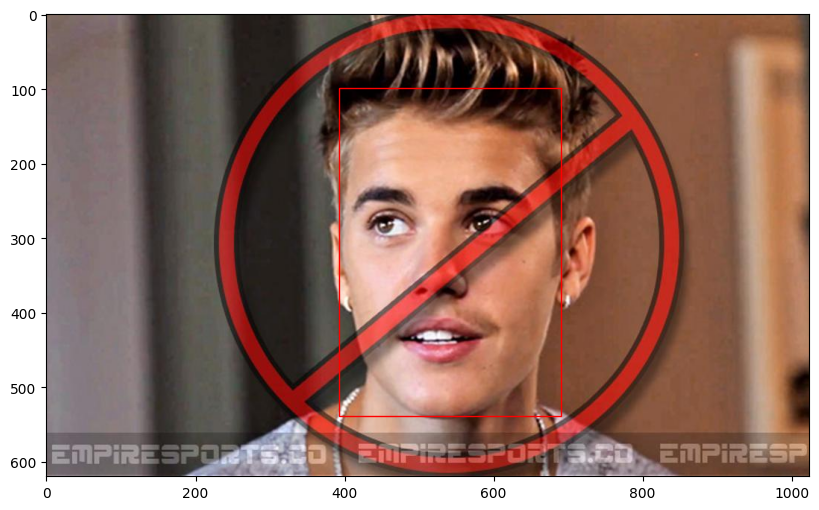

In [3]:
DATA_ROOT = "datasets/widerface_filtered"
split = "val"
# Visualize sample
def plot_sample(img_path, split="train"):
    label_path = img_path.replace("images", "labels").replace(".jpg", ".txt")
    
    img = Image.open(img_path)
    plt.imshow(img)
    
    with open(label_path) as f:
        for line in f:
            _, cx, cy, w, h = map(float, line.split())
            x1 = (cx - w/2) * img.width
            y1 = (cy - h/2) * img.height
            rect = plt.Rectangle((x1, y1), w*img.width, h*img.height,
                                linewidth=1, edgecolor='r', facecolor='none')
            plt.gca().add_patch(rect)

plt.figure(figsize=(10,6))
plot_sample(img_path=f"./{DATA_ROOT}/{split}/images/01696.jpg")

# Загрузим модель

In [24]:
model = YOLO("./yolov8n_face_base3/weights/best.pt")

In [25]:
# Проверим точность, кроме того можно увидеть скорость работы сети и flops

In [27]:
model.eval()
model.val(data="./datasets/data.yaml", imgsz=640, batch=16)

Ultralytics 8.3.94 🚀 Python-3.8.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16080MiB)


val: Scanning /home/hflabs/bot/DeepSchool/speed_up_nn/hw_05/datasets/widerface_filtered/val/labels... 162 images, 0 backgrounds, 0 corrupt: 100%|██████████| 162/162 [00:00<00:00, 3155.35it/s]

val: New cache created: /home/hflabs/bot/DeepSchool/speed_up_nn/hw_05/datasets/widerface_filtered/val/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.84it/s]


                   all        162        165      0.936      0.976      0.978      0.772
Speed: 0.8ms preprocess, 3.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val18


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x70e621398880>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Меняем архитектуру
### Менять архитектуру будем непосредственно в конфиге
Так как лица у нас относительно большие, можно убрать какие(ую)-то ветки(ветку)

# Уберем одну ветку (20 баллов)

In [ ]:
# Уберите одну ветку детекции, найдите(подумайте) ту которая будет давать меньше вклада в текущих условиях

In [28]:
pruned_model = YOLO("./yolov8_pruned_1branch.yaml")

WARNING ⚠️ no model scale passed. Assuming scale='n'.


# Tune it (5 баллов)

In [30]:
result = pruned_model.train(
    data=f"./datasets/data.yaml",
    epochs=50,
    imgsz=640,
    batch=32,
    lr0=0.001,
    name="yolov8n_face_pruned"
)

New https://pypi.org/project/ultralytics/8.3.96 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.94 🚀 Python-3.8.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16080MiB)
engine/trainer: task=detect, mode=train, model=./yolov8_pruned_1branch.yaml, data=./datasets/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_face_pruned2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks

train: Scanning /home/hflabs/bot/DeepSchool/speed_up_nn/hw_05/datasets/widerface_filtered/train/labels... 673 images, 0 backgrounds, 0 corrupt: 100%|██████████| 673/673 [00:00<00:00, 3209.26it/s]

train: New cache created: /home/hflabs/bot/DeepSchool/speed_up_nn/hw_05/datasets/widerface_filtered/train/labels.cache



val: Scanning /home/hflabs/bot/DeepSchool/speed_up_nn/hw_05/datasets/widerface_filtered/val/labels... 162 images, 0 backgrounds, 0 corrupt: 100%|██████████| 162/162 [00:00<00:00, 2076.58it/s]

val: New cache created: /home/hflabs/bot/DeepSchool/speed_up_nn/hw_05/datasets/widerface_filtered/val/labels.cache


Plotting labels to runs/detect/yolov8n_face_pruned2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 44 weight(decay=0.0), 49 weight(decay=0.0005), 48 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8n_face_pruned2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.63G      3.434       3.25      4.149          4        640: 100%|██████████| 22/22 [00:03<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]

                   all        162        165    0.00346          1    0.00743    0.00225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.46G       3.05      2.879        3.7          4        640: 100%|██████████| 22/22 [00:02<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]

                   all        162        165    0.00333      0.982     0.0376     0.0121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.47G      2.916      2.625      3.272          2        640: 100%|██████████| 22/22 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]

                   all        162        165     0.0194      0.715     0.0608     0.0202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.47G      2.826      2.389      3.085          3        640: 100%|██████████| 22/22 [00:02<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.09it/s]

                   all        162        165     0.0401      0.485     0.0353     0.0129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.47G      2.659      2.244      3.023          4        640: 100%|██████████| 22/22 [00:02<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]

                   all        162        165     0.0623       0.57     0.0933     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.47G      2.449       2.01      2.801          2        640: 100%|██████████| 22/22 [00:02<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.11it/s]

                   all        162        165      0.112      0.309     0.0869      0.027



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.47G      2.182      1.881      2.628          1        640: 100%|██████████| 22/22 [00:02<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.35it/s]

                   all        162        165      0.343      0.461      0.311      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.47G      2.242      1.929        2.7          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.10it/s]

                   all        162        165      0.622      0.709      0.632      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.47G      1.965      1.833      2.445          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.07it/s]

                   all        162        165      0.699      0.697       0.75      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.47G      1.817       1.55      2.253          4        640: 100%|██████████| 22/22 [00:02<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.22it/s]

                   all        162        165      0.728      0.698      0.734      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.47G      1.764      1.525      2.202          3        640: 100%|██████████| 22/22 [00:02<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.29it/s]

                   all        162        165      0.728      0.739      0.735      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.47G      1.636      1.423      2.099          4        640: 100%|██████████| 22/22 [00:02<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.22it/s]

                   all        162        165      0.862      0.733       0.84      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.47G      1.565       1.35      2.017          2        640: 100%|██████████| 22/22 [00:02<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.28it/s]

                   all        162        165      0.833      0.754      0.848      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.47G      1.548      1.388      2.007          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.20it/s]

                   all        162        165      0.824      0.737      0.765      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.47G      1.498      1.261      1.918          3        640: 100%|██████████| 22/22 [00:02<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.24it/s]

                   all        162        165      0.849      0.739      0.833      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.47G      1.494      1.283      1.947          3        640: 100%|██████████| 22/22 [00:02<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.21it/s]

                   all        162        165      0.894      0.713      0.845      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.47G      1.439      1.188      1.895          3        640: 100%|██████████| 22/22 [00:02<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.30it/s]

                   all        162        165      0.867      0.624      0.767      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.47G      1.371      1.124       1.83          3        640: 100%|██████████| 22/22 [00:02<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.13it/s]

                   all        162        165        0.9      0.848      0.904      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.47G      1.292      1.089      1.754          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.22it/s]

                   all        162        165      0.897      0.824      0.905      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.47G      1.341      1.131      1.829          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.22it/s]

                   all        162        165      0.899       0.77      0.876      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.47G      1.229      1.015      1.715          2        640: 100%|██████████| 22/22 [00:02<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.30it/s]

                   all        162        165      0.849      0.848      0.893      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.47G      1.249      1.012      1.736          2        640: 100%|██████████| 22/22 [00:02<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.40it/s]

                   all        162        165      0.885      0.867      0.912      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.47G      1.341      1.088      1.758          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.44it/s]

                   all        162        165       0.93      0.811      0.882      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.47G      1.268     0.9743      1.708          2        640: 100%|██████████| 22/22 [00:02<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.17it/s]

                   all        162        165       0.91      0.794      0.898      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.47G      1.212     0.9652      1.714          2        640: 100%|██████████| 22/22 [00:02<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.49it/s]

                   all        162        165       0.91      0.806       0.89      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.47G      1.182     0.9228      1.674          2        640: 100%|██████████| 22/22 [00:02<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.34it/s]

                   all        162        165      0.849      0.861      0.876      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.47G      1.166     0.9474      1.653          2        640: 100%|██████████| 22/22 [00:02<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.96it/s]

                   all        162        165      0.943      0.818      0.933      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.47G      1.155     0.9256      1.643          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.44it/s]

                   all        162        165      0.927      0.848       0.92      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.47G      1.147     0.8544      1.639          2        640: 100%|██████████| 22/22 [00:02<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.25it/s]

                   all        162        165      0.883      0.885      0.937      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.47G      1.086     0.8286      1.585          2        640: 100%|██████████| 22/22 [00:02<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.28it/s]

                   all        162        165      0.946      0.836      0.941      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.47G      1.091     0.8112      1.584          1        640: 100%|██████████| 22/22 [00:02<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.24it/s]

                   all        162        165      0.894      0.873      0.937      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.47G        1.1     0.8343      1.572          2        640: 100%|██████████| 22/22 [00:02<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.17it/s]

                   all        162        165      0.927      0.852      0.932      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.47G      1.042     0.8004      1.545          2        640: 100%|██████████| 22/22 [00:02<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.42it/s]

                   all        162        165      0.885       0.89      0.942      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.47G      1.024     0.7524      1.512          3        640: 100%|██████████| 22/22 [00:02<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.26it/s]

                   all        162        165      0.889      0.825      0.925      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.47G      1.089     0.7691      1.591          2        640: 100%|██████████| 22/22 [00:02<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.30it/s]

                   all        162        165      0.954      0.836      0.949      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.47G     0.9966     0.7383      1.516          2        640: 100%|██████████| 22/22 [00:02<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.39it/s]

                   all        162        165      0.932       0.92      0.944       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.47G     0.9891     0.7381      1.506          3        640: 100%|██████████| 22/22 [00:02<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.45it/s]

                   all        162        165      0.936      0.873      0.935      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      38/50      4.47G      1.007     0.7506      1.508          2        640: 100%|██████████| 22/22 [00:02<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.49it/s]

                   all        162        165      0.925      0.899      0.951      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.47G      1.024     0.7577      1.504          2        640: 100%|██████████| 22/22 [00:02<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.32it/s]

                   all        162        165      0.949      0.848      0.943      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.47G      0.972     0.7181      1.486          2        640: 100%|██████████| 22/22 [00:02<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.50it/s]

                   all        162        165      0.875      0.934      0.958      0.711


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.47G     0.8667     0.6544      1.393          1        640: 100%|██████████| 22/22 [00:03<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.36it/s]

                   all        162        165      0.944      0.873      0.956      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.47G     0.8727     0.6041      1.377          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.45it/s]

                   all        162        165      0.949      0.896      0.956      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.47G     0.7973     0.5451      1.312          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.21it/s]

                   all        162        165      0.921      0.909      0.957      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.47G     0.7912     0.5452      1.313          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.34it/s]

                   all        162        165      0.959      0.915      0.964      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.47G      0.783     0.5279       1.31          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.36it/s]

                   all        162        165      0.919      0.939      0.967      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.47G     0.7958     0.5332      1.323          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.53it/s]

                   all        162        165       0.93      0.915      0.967      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.47G     0.7525     0.5046      1.297          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.43it/s]

                   all        162        165      0.935      0.927      0.972      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.47G     0.7225     0.4908       1.26          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.76it/s]

                   all        162        165      0.934      0.939      0.971      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      49/50      4.47G     0.7382     0.4881      1.289          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.52it/s]

                   all        162        165      0.918      0.951      0.975      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.47G      0.725     0.4756       1.27          1        640: 100%|██████████| 22/22 [00:02<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.28it/s]

                   all        162        165      0.949      0.911      0.974      0.743



50 epochs completed in 0.047 hours.
Optimizer stripped from runs/detect/yolov8n_face_pruned2/weights/last.pt, 6.4MB
Optimizer stripped from runs/detect/yolov8n_face_pruned2/weights/best.pt, 6.4MB

Validating runs/detect/yolov8n_face_pruned2/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.8.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16080MiB)
YOLOv8_pruned_1branch summary (fused): 54 layers, 3,099,410 parameters, 0 gradients, 6.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]


                   all        162        165      0.918      0.951      0.975      0.742
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/yolov8n_face_pruned2


In [31]:
pruned_model.val(data="./datasets/data.yaml", imgsz=640, batch=16)

Ultralytics 8.3.94 🚀 Python-3.8.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16080MiB)
YOLOv8_pruned_1branch summary (fused): 54 layers, 3,099,410 parameters, 0 gradients, 6.0 GFLOPs


val: Scanning /home/hflabs/bot/DeepSchool/speed_up_nn/hw_05/datasets/widerface_filtered/val/labels.cache... 162 images, 0 backgrounds, 0 corrupt: 100%|██████████| 162/162 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.76it/s]


                   all        162        165      0.923       0.95      0.976      0.743
Speed: 0.7ms preprocess, 1.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/yolov8n_face_pruned22


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x70e514fee550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Уберем две ветки (20 баллов)

In [33]:
pruned_model_2branches = YOLO("./yolov8_pruned_2branch.yaml")

WARNING ⚠️ no model scale passed. Assuming scale='n'.


# Tune it (5 баллов)

In [34]:
result_2branches = pruned_model_2branches.train(
    data=f"./datasets/data.yaml",
    epochs=50,
    imgsz=640,
    batch=32,
    lr0=0.001,
    name="yolov8n_face_pruned_2branche"
)

New https://pypi.org/project/ultralytics/8.3.96 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.94 🚀 Python-3.8.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16080MiB)
engine/trainer: task=detect, mode=train, model=./yolov8_pruned_2branch.yaml, data=./datasets/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_face_pruned_2branche, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

train: Scanning /home/hflabs/bot/DeepSchool/speed_up_nn/hw_05/datasets/widerface_filtered/train/labels.cache... 673 images, 0 backgrounds, 0 corrupt: 100%|██████████| 673/673 [00:00<?, ?it/s]
val: Scanning /home/hflabs/bot/DeepSchool/speed_up_nn/hw_05/datasets/widerface_filtered/val/labels.cache... 162 images, 0 backgrounds, 0 corrupt: 100%|██████████| 162/162 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8n_face_pruned_2branche/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 36 weight(decay=0.0), 39 weight(decay=0.0005), 38 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8n_face_pruned_2branche
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.19G      6.542      5.747      3.972          4        640: 100%|██████████| 22/22 [00:03<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]

                   all        162        165    0.00781      0.158    0.00674    0.00195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50       4.1G      4.381      2.983      3.042          4        640: 100%|██████████| 22/22 [00:02<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.44it/s]

                   all        162        165     0.0114      0.352     0.0233    0.00496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       4.1G      3.384      1.887      2.129          2        640: 100%|██████████| 22/22 [00:02<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.37it/s]

                   all        162        165      0.127      0.421     0.0903     0.0201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       4.1G      2.812      1.462      1.829          3        640: 100%|██████████| 22/22 [00:02<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.12it/s]

                   all        162        165      0.178      0.576      0.157      0.044



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       4.1G      2.618      1.367      1.705          4        640: 100%|██████████| 22/22 [00:02<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.23it/s]

                   all        162        165      0.235      0.588        0.2     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       4.1G      2.561       1.37      1.663          2        640: 100%|██████████| 22/22 [00:02<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.22it/s]

                   all        162        165       0.13      0.303     0.0833     0.0228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/50       4.1G      2.383      1.281      1.597          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.22it/s]

                   all        162        165      0.616      0.613      0.561      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       4.1G      2.404       1.31      1.576          1        640: 100%|██████████| 22/22 [00:02<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.35it/s]

                   all        162        165      0.513      0.703      0.497      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/50       4.1G      2.458      1.367      1.603          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.21it/s]

                   all        162        165      0.658      0.606      0.644      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       4.1G      2.304      1.197      1.466          4        640: 100%|██████████| 22/22 [00:02<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.12it/s]

                   all        162        165      0.592      0.493      0.528      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       4.1G      2.193      1.148      1.436          3        640: 100%|██████████| 22/22 [00:02<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.22it/s]

                   all        162        165      0.649      0.448      0.525      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      12/50       4.1G      2.159      1.135      1.421          4        640: 100%|██████████| 22/22 [00:02<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.32it/s]

                   all        162        165      0.618       0.63      0.645      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       4.1G      1.942      1.028      1.339          2        640: 100%|██████████| 22/22 [00:02<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.33it/s]

                   all        162        165      0.831      0.747      0.792      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       4.1G      1.961      1.096      1.372          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.41it/s]

                   all        162        165      0.765      0.721      0.721      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      15/50       4.1G       1.92      1.068      1.324          3        640: 100%|██████████| 22/22 [00:02<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.14it/s]

                   all        162        165       0.82      0.727      0.804      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       4.1G      1.877     0.9852      1.294          3        640: 100%|██████████| 22/22 [00:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.45it/s]

                   all        162        165      0.873      0.824      0.896      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       4.1G      1.798     0.9365      1.274          3        640: 100%|██████████| 22/22 [00:02<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.34it/s]

                   all        162        165      0.937      0.715      0.836      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      18/50       4.1G      1.716     0.9301      1.247          3        640: 100%|██████████| 22/22 [00:02<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.22it/s]

                   all        162        165       0.89      0.745      0.842      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       4.1G       1.64      0.884      1.221          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]

                   all        162        165      0.854       0.77      0.832      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       4.1G      1.659     0.8719      1.232          1        640: 100%|██████████| 22/22 [00:02<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.34it/s]

                   all        162        165      0.929      0.806       0.89       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       4.1G      1.546     0.8253      1.192          2        640: 100%|██████████| 22/22 [00:02<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]

                   all        162        165      0.911      0.807      0.883      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       4.1G      1.559     0.8226      1.191          2        640: 100%|██████████| 22/22 [00:02<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.24it/s]

                   all        162        165      0.882      0.818      0.883      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       4.1G      1.461     0.9764      1.121          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.13it/s]

                   all        162        165      0.924      0.818      0.891      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      24/50       4.1G      1.632     0.9537      1.196          2        640: 100%|██████████| 22/22 [00:02<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.48it/s]

                   all        162        165      0.921      0.781      0.879      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      25/50       4.1G      1.526     0.8139      1.216          2        640: 100%|██████████| 22/22 [00:02<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.52it/s]

                   all        162        165      0.908       0.84       0.89       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       4.1G      1.466     0.7767      1.149          2        640: 100%|██████████| 22/22 [00:02<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.42it/s]

                   all        162        165      0.931      0.824      0.915      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      27/50       4.1G      1.544     0.8789      1.185          2        640: 100%|██████████| 22/22 [00:02<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.71it/s]

                   all        162        165      0.895      0.878      0.932      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      28/50       4.1G      1.473     0.7922      1.187          1        640: 100%|██████████| 22/22 [00:02<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.24it/s]

                   all        162        165      0.937      0.788      0.901      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       4.1G       1.36     0.7189      1.129          2        640: 100%|██████████| 22/22 [00:02<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.21it/s]

                   all        162        165      0.934      0.863      0.912      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       4.1G      1.302     0.6907      1.088          2        640: 100%|██████████| 22/22 [00:02<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]

                   all        162        165       0.91      0.903      0.934      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       4.1G      1.313     0.6856       1.07          1        640: 100%|██████████| 22/22 [00:02<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.29it/s]

                   all        162        165      0.933      0.855      0.949      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      32/50       4.1G       1.26     0.6843      1.084          2        640: 100%|██████████| 22/22 [00:02<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.40it/s]

                   all        162        165      0.909      0.845      0.924      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       4.1G      1.254     0.6764       1.08          2        640: 100%|██████████| 22/22 [00:02<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.70it/s]

                   all        162        165       0.91      0.885       0.94      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       4.1G       1.17     0.6439      1.054          3        640: 100%|██████████| 22/22 [00:02<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.65it/s]

                   all        162        165      0.904      0.867      0.931      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      35/50       4.1G      1.234     0.6571      1.079          2        640: 100%|██████████| 22/22 [00:02<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.28it/s]

                   all        162        165      0.923      0.873      0.943      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      36/50       4.1G      1.182     0.6352      1.063          2        640: 100%|██████████| 22/22 [00:02<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.75it/s]

                   all        162        165      0.924      0.873      0.944      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       4.1G      1.182     0.6343      1.055          3        640: 100%|██████████| 22/22 [00:02<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.73it/s]

                   all        162        165      0.927      0.841      0.936      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      38/50       4.1G      1.192     0.6656      1.088          2        640: 100%|██████████| 22/22 [00:02<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.76it/s]

                   all        162        165      0.927       0.92       0.95      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       4.1G        1.2      0.677      1.103          2        640: 100%|██████████| 22/22 [00:02<00:00,  9.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.64it/s]

                   all        162        165      0.926      0.904      0.952      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      40/50       4.1G      1.097     0.6135      1.039          2        640: 100%|██████████| 22/22 [00:02<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.61it/s]

                   all        162        165      0.949      0.897      0.957      0.694


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       4.1G      1.091     0.6496      1.069          1        640: 100%|██████████| 22/22 [00:03<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.66it/s]

                   all        162        165       0.95      0.855      0.949      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       4.1G      1.023     0.5862      1.027          1        640: 100%|██████████| 22/22 [00:02<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.44it/s]

                   all        162        165      0.927      0.921      0.962      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       4.1G     0.9618     0.5571      1.008          1        640: 100%|██████████| 22/22 [00:02<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.85it/s]

                   all        162        165      0.938      0.909      0.961      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      44/50       4.1G     0.9531     0.5473      1.009          1        640: 100%|██████████| 22/22 [00:02<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.77it/s]

                   all        162        165      0.928      0.943      0.971      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       4.1G     0.9404     0.5408     0.9901          1        640: 100%|██████████| 22/22 [00:02<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]

                   all        162        165      0.914      0.909      0.961      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       4.1G     0.9298     0.5428      1.005          1        640: 100%|██████████| 22/22 [00:02<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.76it/s]

                   all        162        165      0.909      0.933      0.964      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      47/50       4.1G     0.9225     0.5229      1.007          1        640: 100%|██████████| 22/22 [00:02<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.49it/s]

                   all        162        165      0.932      0.939      0.967      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      48/50       4.1G     0.8919     0.5129      0.996          1        640: 100%|██████████| 22/22 [00:02<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.45it/s]

                   all        162        165      0.938      0.939      0.971      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      49/50       4.1G     0.9438     0.5307      1.024          1        640: 100%|██████████| 22/22 [00:02<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.37it/s]

                   all        162        165       0.94      0.954      0.974      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       4.1G     0.8764     0.5032     0.9748          1        640: 100%|██████████| 22/22 [00:02<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.11it/s]

                   all        162        165      0.927      0.933      0.967      0.717



50 epochs completed in 0.042 hours.
Optimizer stripped from runs/detect/yolov8n_face_pruned_2branche/weights/last.pt, 7.5MB
Optimizer stripped from runs/detect/yolov8n_face_pruned_2branche/weights/best.pt, 7.5MB

Validating runs/detect/yolov8n_face_pruned_2branche/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.8.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16080MiB)
YOLOv8_pruned_2branch summary (fused): 41 layers, 3,688,785 parameters, 0 gradients, 3.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]


                   all        162        165      0.927      0.933      0.967      0.719
Speed: 0.2ms preprocess, 1.1ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/yolov8n_face_pruned_2branche


# Сравним модели

In [5]:
# Inference speed test
def time_inference(model, img_path):
    torch.cuda.synchronize()
    start = time.time()
    _ = model.predict(img_path)
    torch.cuda.synchronize()
    return time.time() - start

# Accuracy comparison
base_model = YOLO("./yolov8n_face_base3/weights/best.pt")
pruned_model = YOLO("./runs/detect/yolov8n_face_pruned2/weights/best.pt")
sample_img = torch.rand(1,3,2048,2048, device="cuda")

print(f"""
| Metric           | Base Model | Pruned Model |
|------------------|------------|--------------|
| Inference Time   | {time_inference(base_model, sample_img):.4f}s | {time_inference(pruned_model, sample_img):.4f}s |
| mAP@50           | {base_model.val().box.map:.3f}      | {pruned_model.val().box.map:.3f}      |
| Parameters       | {sum(p.numel() for p in base_model.parameters()):,} | {sum(p.numel() for p in pruned_model.parameters()):,} |
""")


0: 2048x2048 (no detections), 14.4ms
Speed: 0.0ms preprocess, 14.4ms inference, 7.6ms postprocess per image at shape (1, 3, 2048, 2048)

0: 2048x2048 1 face, 10.7ms
Speed: 0.0ms preprocess, 10.7ms inference, 3.4ms postprocess per image at shape (1, 3, 2048, 2048)
Ultralytics 8.3.94 🚀 Python-3.8.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16080MiB)


val: Scanning /home/hflabs/bot/DeepSchool/speed_up_nn/hw_05/datasets/widerface_filtered/val/labels.cache... 162 images, 0 backgrounds, 0 corrupt: 100%|██████████| 162/162 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.54it/s]


                   all        162        165      0.936      0.976      0.978      0.772
Speed: 0.7ms preprocess, 3.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val22
Ultralytics 8.3.94 🚀 Python-3.8.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16080MiB)


val: Scanning /home/hflabs/bot/DeepSchool/speed_up_nn/hw_05/datasets/widerface_filtered/val/labels.cache... 162 images, 0 backgrounds, 0 corrupt: 100%|██████████| 162/162 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.59it/s]


                   all        162        165      0.923       0.95      0.976      0.743
Speed: 0.8ms preprocess, 1.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val23

| Metric           | Base Model | Pruned Model |
|------------------|------------|--------------|
| Inference Time   | 0.0831s | 0.0640s |
| mAP@50           | 0.772      | 0.743      |
| Parameters       | 3,005,843 | 3,099,410 |

